In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [33]:
df=pd.read_csv('/home/yeshi/Desktop/data_sets/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
df.tail(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [37]:
df=df.iloc[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [35]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
dt                        3192 non-null object
LandAverageTemperature    3180 non-null float64
dtypes: float64(1), object(1)
memory usage: 50.0+ KB


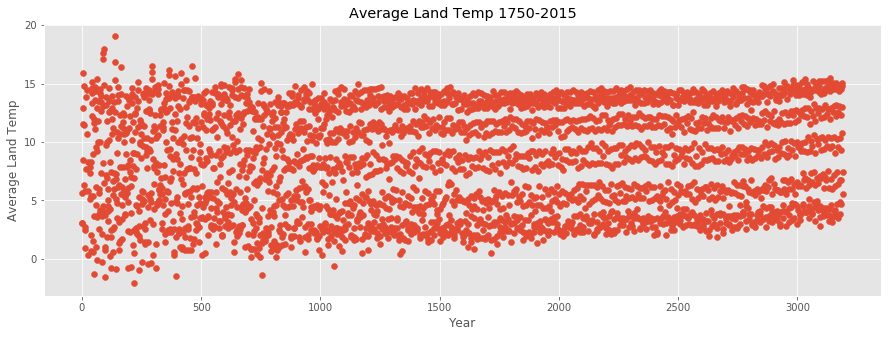

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['LandAverageTemperature'].index,y=df["LandAverageTemperature"])
plt.title("Average Land Temp 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temp")
plt.show()

In [51]:
print(type(df['dt'][0]))

<class 'str'>


In [52]:
times=pd.DatetimeIndex(df['dt'])
grouped=df.groupby([times.year]).mean()

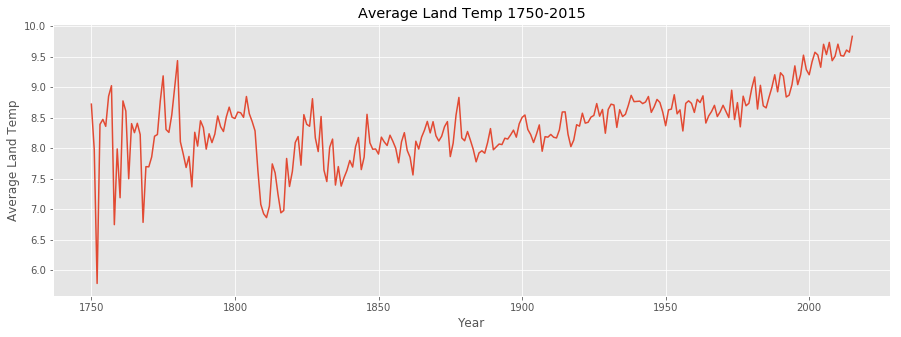

In [55]:
plt.figure(figsize=(15,5))
plt.plot(grouped['LandAverageTemperature'])
plt.title("Average Land Temp 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temp")
plt.show()

In [56]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [60]:
df[times.year==1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [63]:
df[np.isnan(df.LandAverageTemperature)]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [64]:
df.LandAverageTemperature=df.LandAverageTemperature.fillna(method='ffill')

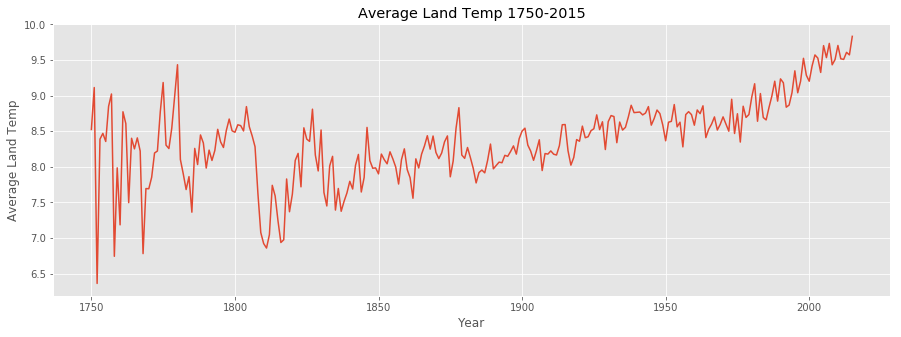

In [65]:
grouped=df.groupby([times.year]).mean()
plt.figure(figsize=(15,5))
plt.plot(grouped['LandAverageTemperature'])
plt.title("Average Land Temp 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temp")
plt.show()


In [66]:
from sklearn.linear_model import LinearRegression as LinReg

In [69]:
x=grouped.index.values.reshape(-1,1)
y=grouped.LandAverageTemperature.values

In [79]:
model=LinReg()
model.fit(x,y)
y_preds=model.predict(x)
print("Accuracy:"+ str(model.score(x,y)))

Accuracy:0.376683227531


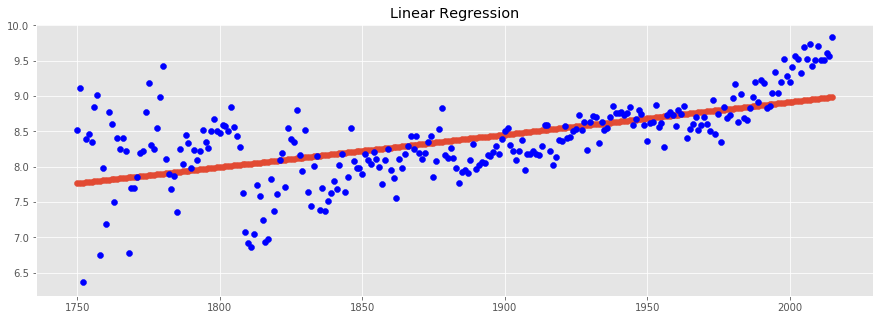

In [80]:
plt.figure(figsize=(15,5))
plt.title('Linear Regression')
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x, y=y, c='b')

In [83]:
model.predict(1950)

array([ 8.68586597])